Predicting Anaemia from Image Pixels and Hemoglobin Levels
- Dataset Description
This dataset is curated to facilitate the development of machine learning models aimed at predicting Predicting Anaemia from Image Pixels and Hemoglobin Levels
- Dataset Description:
This dataset is curated to facilitate the development of machine learning models aimed at predicting anaemia based on hemoglobin levels and color pixel distribution from associated images. Each row in the dataset corresponds to an individual case with various features

- Columns:
- Number:
- Type: Integer
- Description:
A unique identifier for each individual case.
- Sex:
- Type: Categorical (Male, Female)
- Description: The sex of the individual.
- %Red Pixel:
- Type: Float
- Description: The percentage of red pixels in the image associated with the case.
- %Green Pixel:
- Type: Float
- Description: The percentage of green pixels in the image associated with the case.
- %Blue Pixel:
- Type: Float
- Description: The percentage of blue pixels in the image associated with the case.
- Hb:
- Type: Float
- Description: Hemoglobin level of the individual, measured in grams per deciliter (g/dL).
- Anaemic:
- Type:Catagorical (Yes | No )
- Description: An indicator of anaemia status (1 for anaemic, 0 for not anaemic).
Usage

## This dataset can be utilized for:

*Developing and testing machine learning models to predict *anaemia.* Analyzing the correlation between hemoglobin levels and color pixel distribution in images. Educational purposes for learning data preprocessing, feature engineering, and model building. Acknowledgements.
Please ensure proper citation if you use this dataset in your research or project. We appreciate your feedback and suggestions for improving the dataset.



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image
#import pydotplus as pydot
from sklearn import tree
from os import system


In [ ]:
dd = pd.read_csv("Anaemia Prediction.csv")

In [ ]:
dd.head()

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No


In [ ]:
dd.tail()

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
99,100,F,49.9999,29.2860,20.7141,14.5,Yes
100,101,M,42.2324,30.6757,27.0919,6.3,Yes
101,102,F,45.6064,31.9084,22.4852,12.7,No
102,103,M,45.2095,29.2769,25.5136,13.4,No
103,104,F,43.5706,29.8094,26.6199,12.2,No


In [ ]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        104 non-null    int64  
 1   Sex           104 non-null    object 
 2   %Red Pixel    104 non-null    float64
 3   %Green pixel  104 non-null    float64
 4   %Blue pixel   104 non-null    float64
 5   Hb            104 non-null    float64
 6   Anaemic       104 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.8+ KB


In [ ]:
dd.describe()

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb
count,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,45.654175,28.875507,25.470325,12.150962
std,30.166206,2.816294,1.554275,1.984671,2.512957
min,1.000000,38.796800,25.140300,19.541300,2.800000
25%,26.750000,43.911375,27.871300,24.896425,10.650000
50%,52.500000,45.385350,28.948750,25.953200,12.600000
75%,78.250000,46.968325,29.887275,26.721600,14.000000
max,104.000000,54.647800,32.368100,29.841400,16.300000


In [ ]:
dd.isnull().sum()

Number          0
Sex             0
%Red Pixel      0
%Green pixel    0
%Blue pixel     0
Hb              0
Anaemic         0
dtype: int64

In [ ]:
for i in dd.columns:
    if dd[i].dtype == "object":
        dd[i] = pd.Categorical(dd[i]).codes

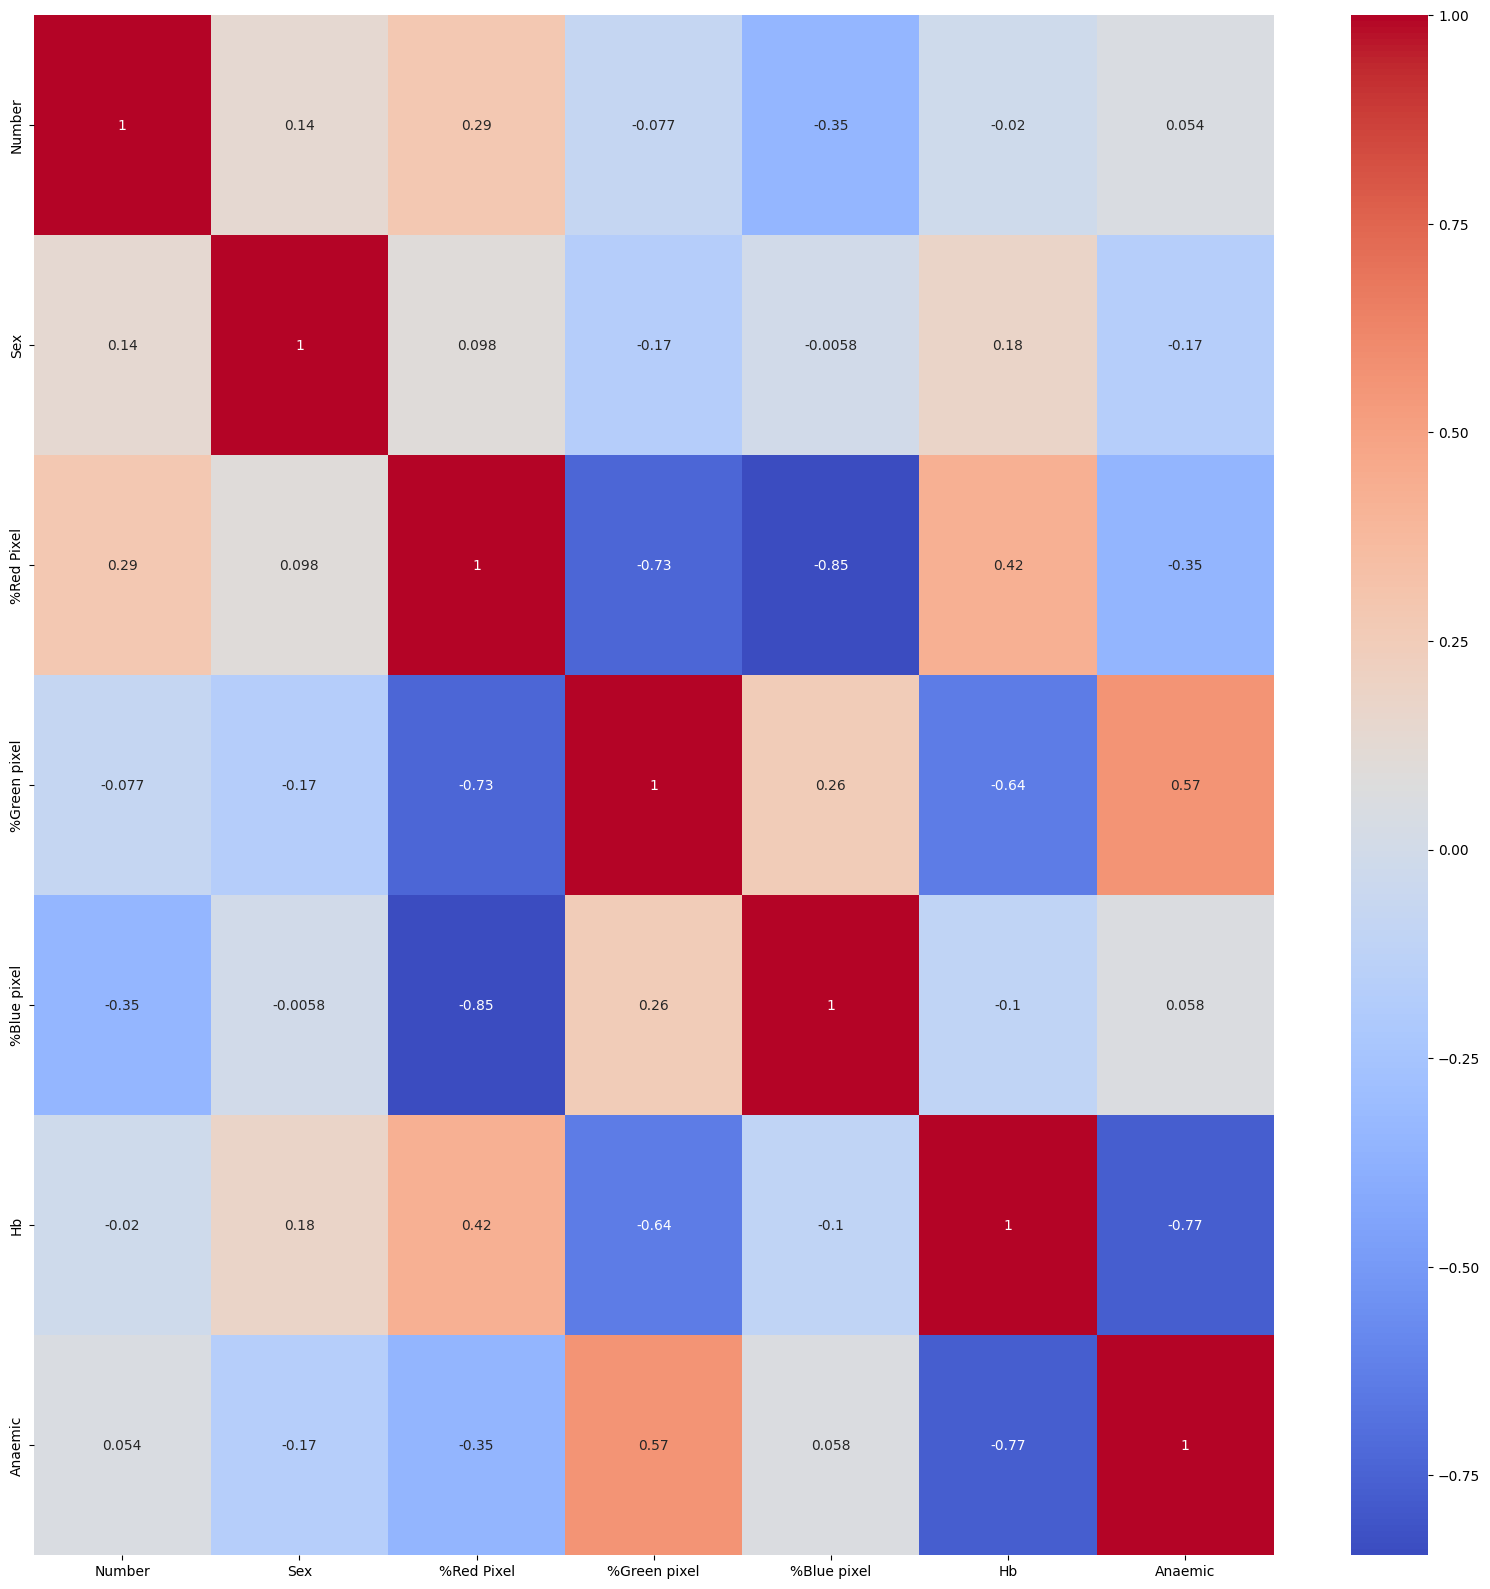

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(dd.corr(), annot= True, cmap="coolwarm")
plt.show()

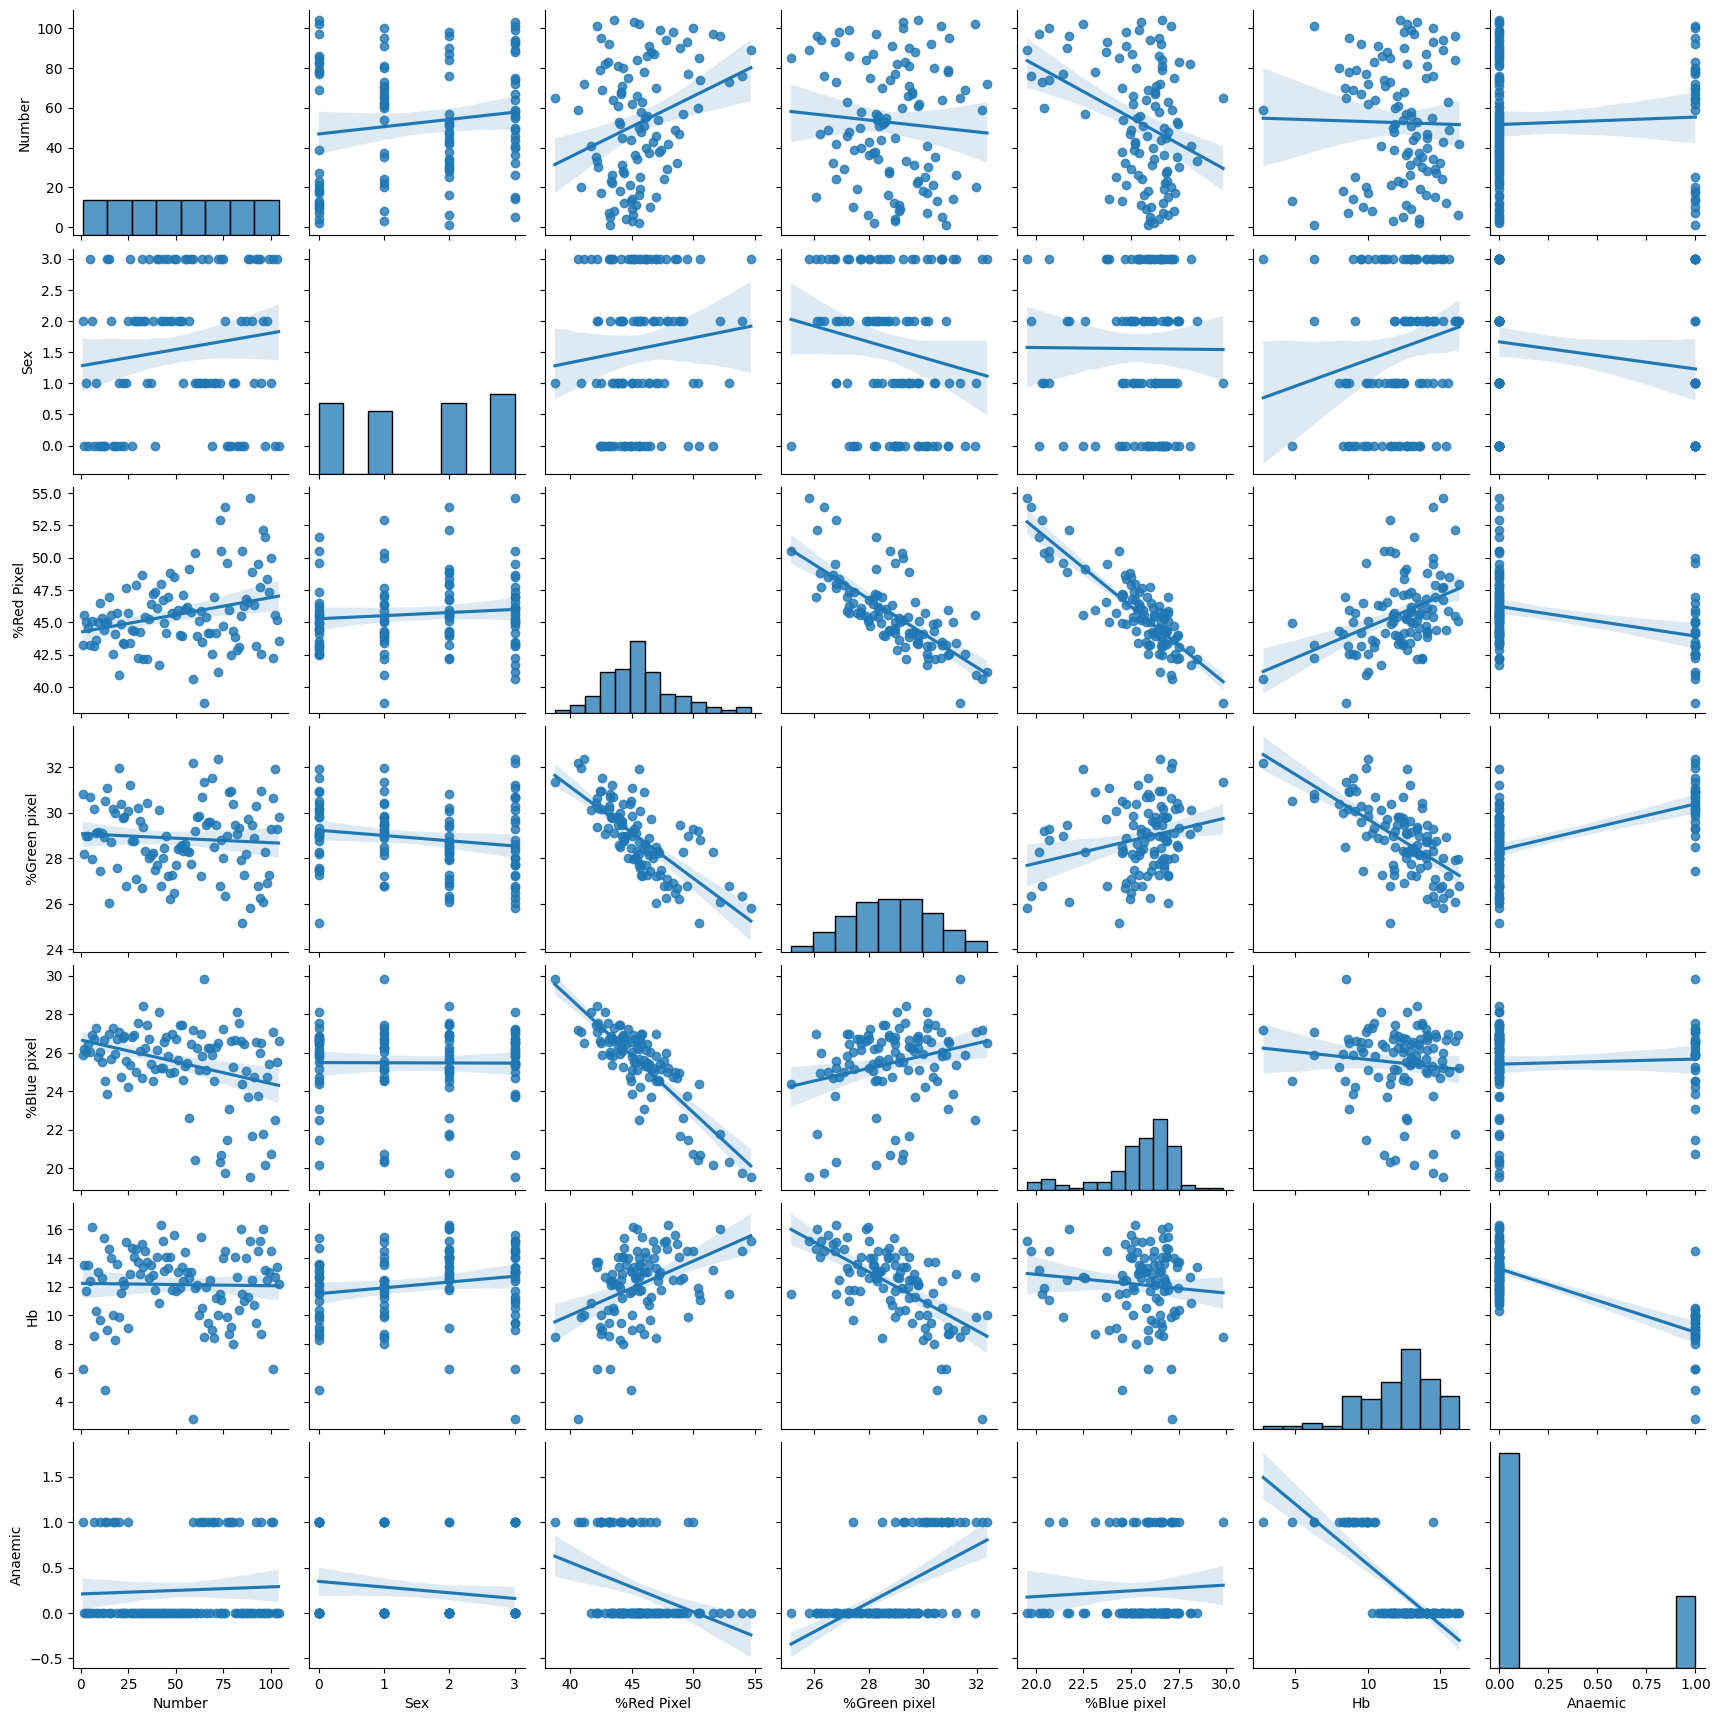

In [ ]:
sns.pairplot(data=dd, kind="reg")

In [ ]:
for feature in dd.select_dtypes(["float64","int64","object"]).columns:
  print(dd[feature].value_counts())

Number
1      1
2      1
77     1
76     1
75     1
      ..
32     1
31     1
30     1
29     1
104    1
Name: count, Length: 104, dtype: int64
%Red Pixel
44.1609    2
43.2555    1
45.4201    1
49.5899    1
53.9113    1
          ..
48.6358    1
44.2572    1
42.2473    1
47.8913    1
43.5706    1
Name: count, Length: 103, dtype: int64
%Green pixel
29.5993    2
30.8421    1
29.4684    1
28.9754    1
26.3455    1
          ..
26.6982    1
29.6578    1
30.2089    1
27.0952    1
29.8094    1
Name: count, Length: 103, dtype: int64
%Blue pixel
26.2399    2
25.9025    1
25.1115    1
21.4347    1
19.7433    1
          ..
24.6660    1
26.0850    1
27.5438    1
25.0135    1
26.6199    1
Name: count, Length: 103, dtype: int64
Hb
14.1    5
13.0    5
14.5    4
15.2    3
12.4    3
       ..
4.8     1
14.4    1
2.8     1
9.1     1
12.2    1
Name: count, Length: 62, dtype: int64


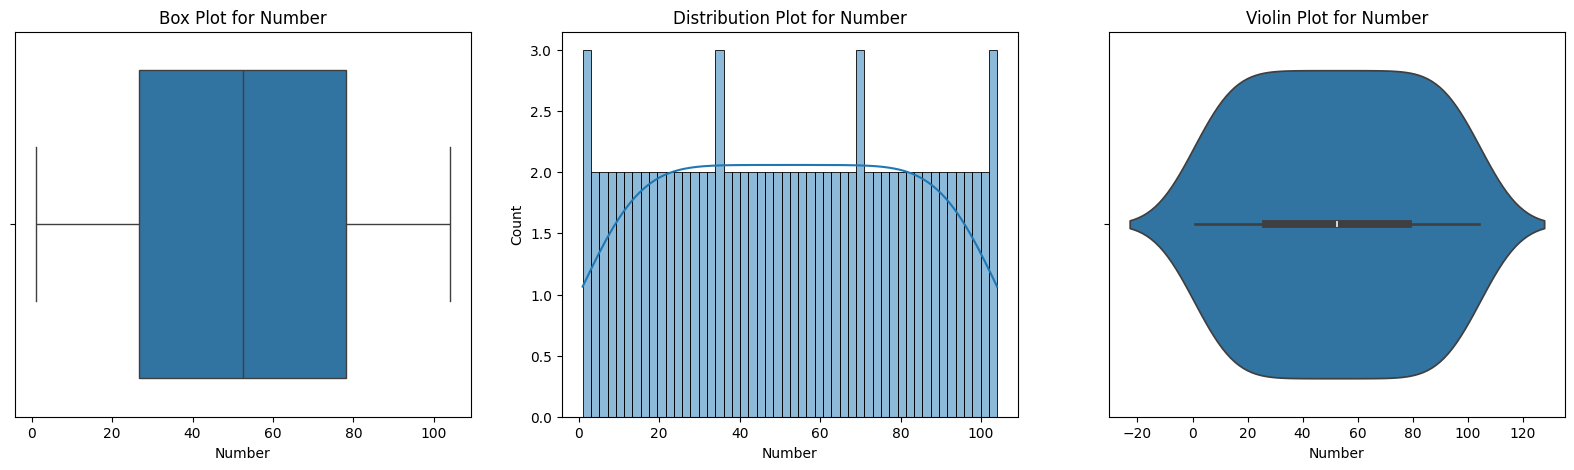

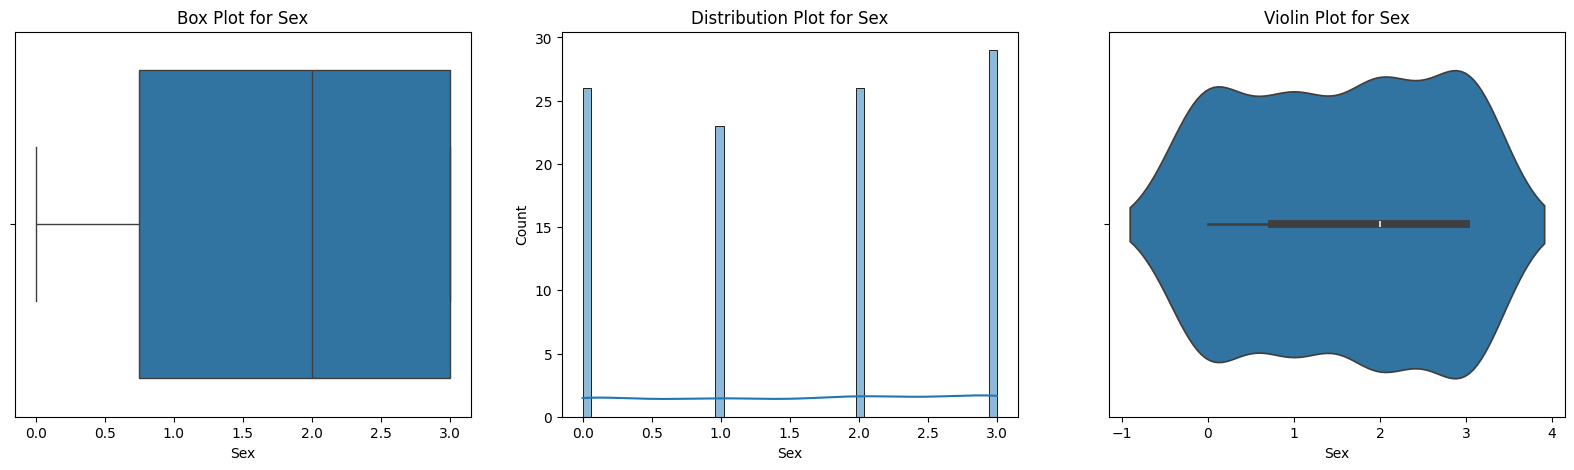

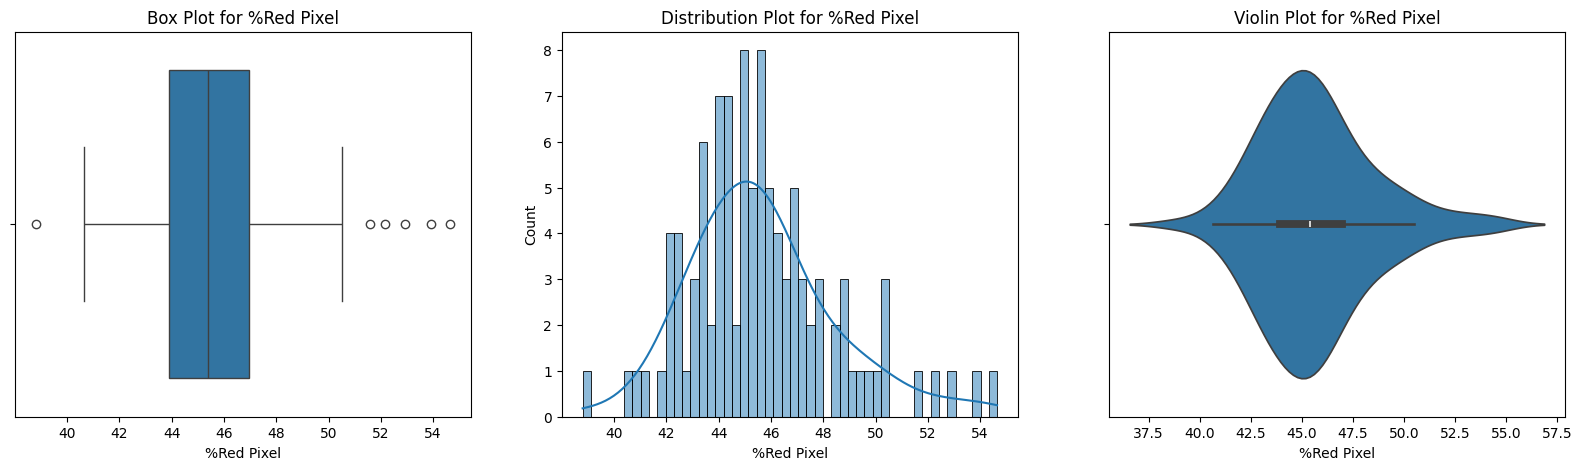

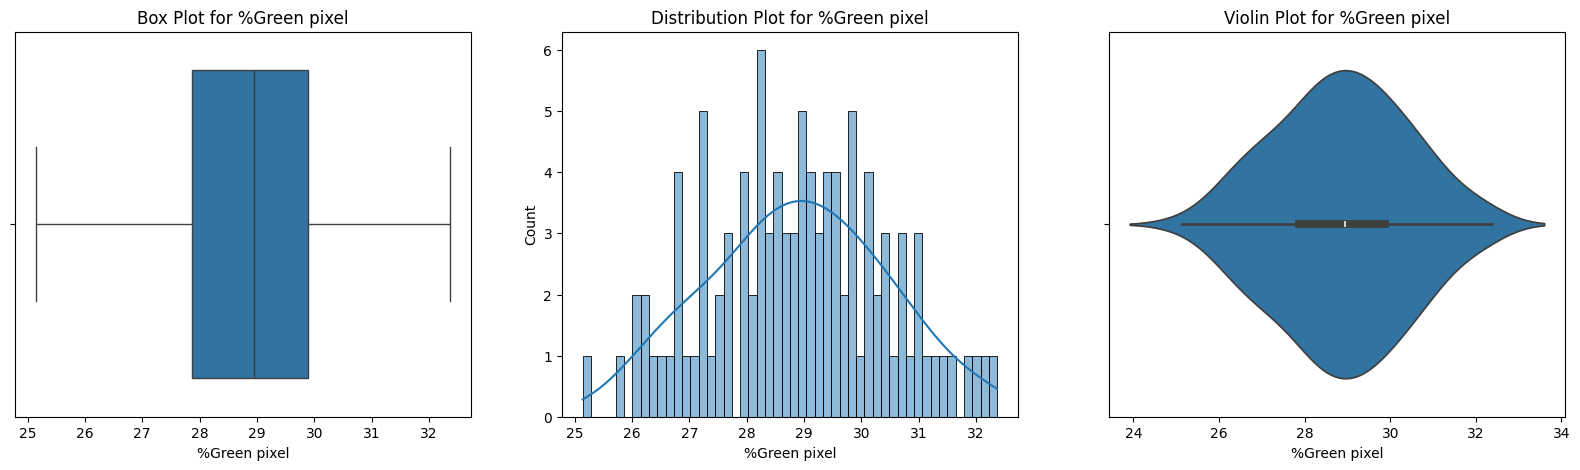

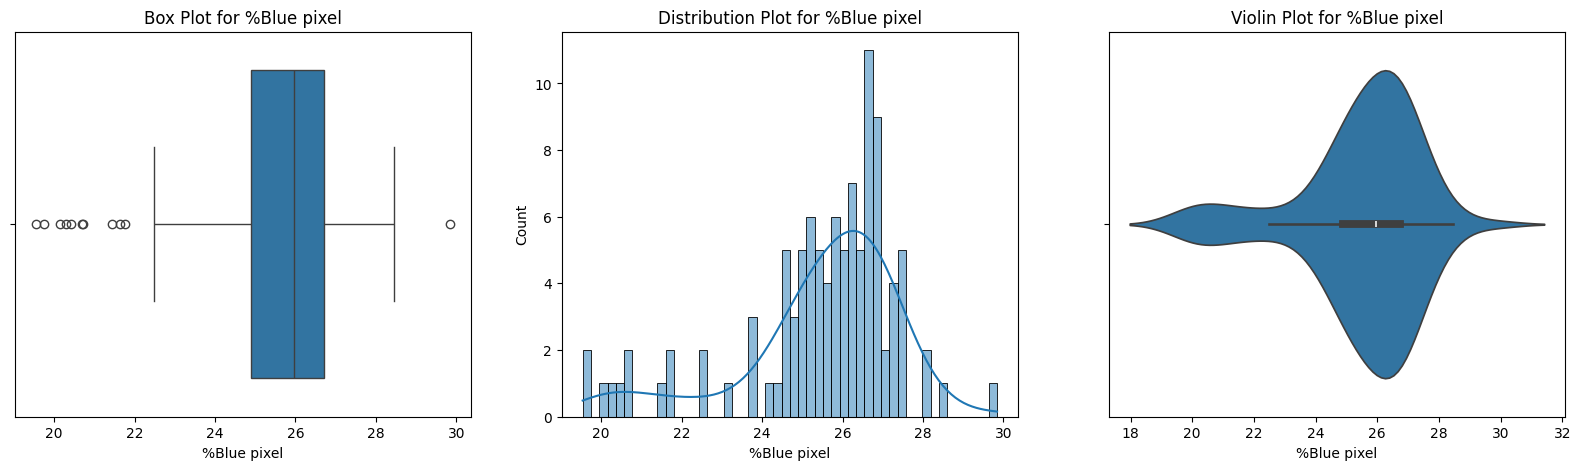

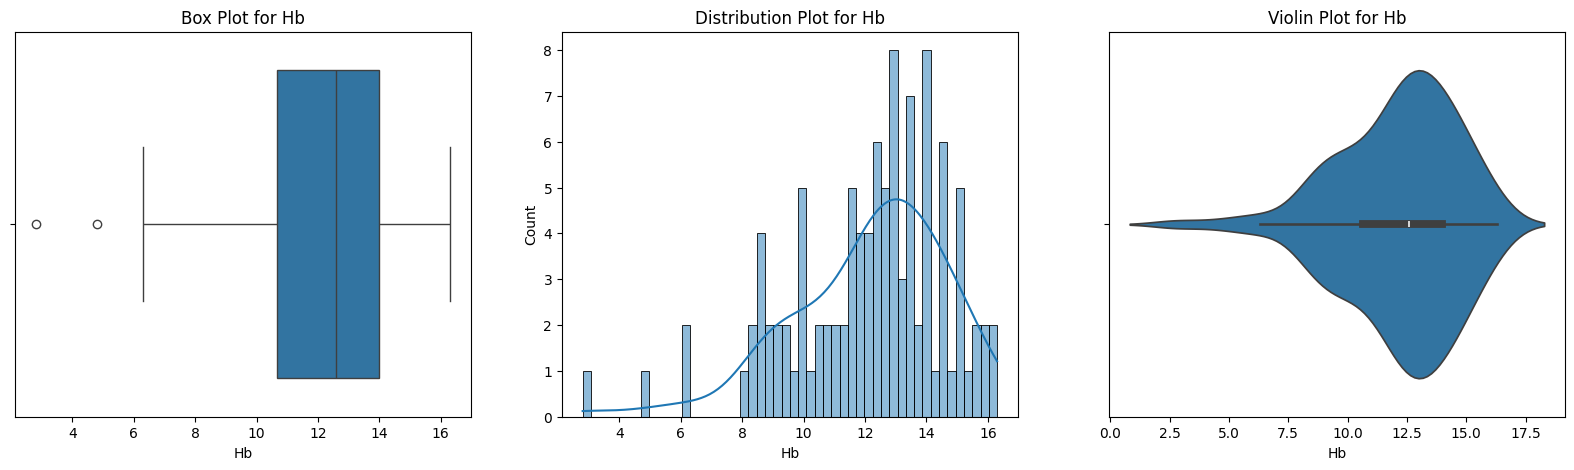

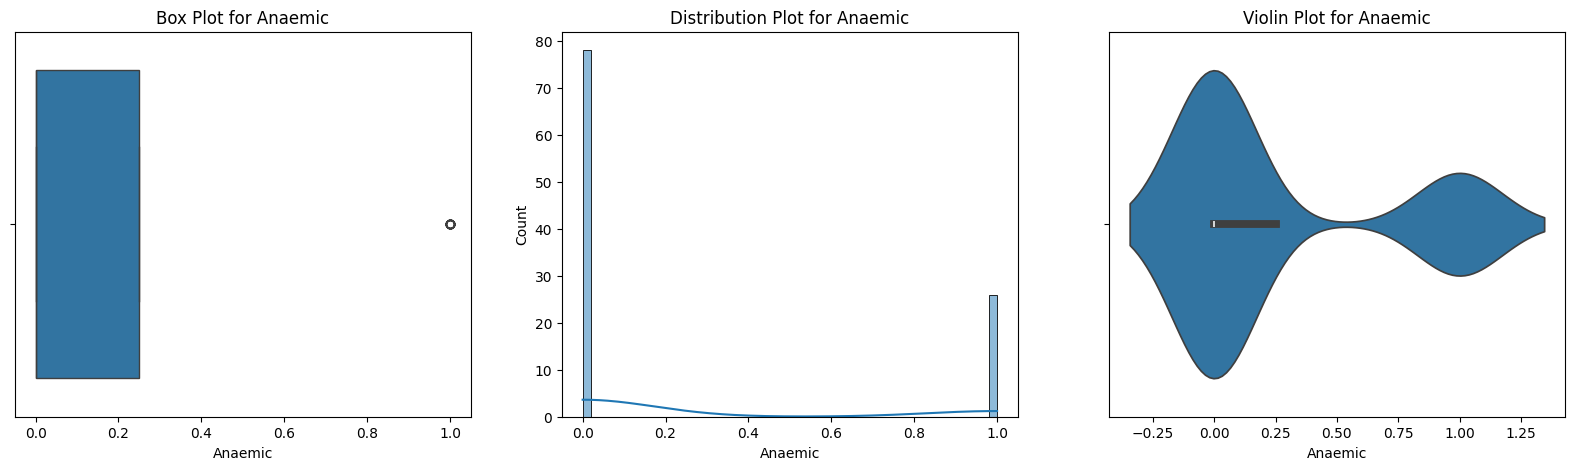

In [ ]:
# So once completing all the categorical data to numeric we are checking the outliers in data visualation
def plot(ss, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=ss, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=ss, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=ss, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

for i in['Number', 'Sex', '%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb',
       'Anaemic']:
    plot(dd,i)

In [ ]:
dd.columns

Index(['Number', 'Sex', '%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb',
       'Anaemic'],
      dtype='object')

In [ ]:
from scipy.stats.mstats import winsorize
dd['%Red Pixel'] = winsorize(dd['%Red Pixel'], limits=(0.05,0.05))
dd['%Green pixel'] = winsorize(dd['%Green pixel'], limits=(0.05,0.05))
dd["%Blue pixel"] = winsorize(dd["%Blue pixel"], limits=(0.05,0.05))
dd["Hb"] = winsorize(dd["Hb"],limits=(0.05,0.05))
dd["Anaemic"] = winsorize(dd["Anaemic"], limits=(0.05,0.05))

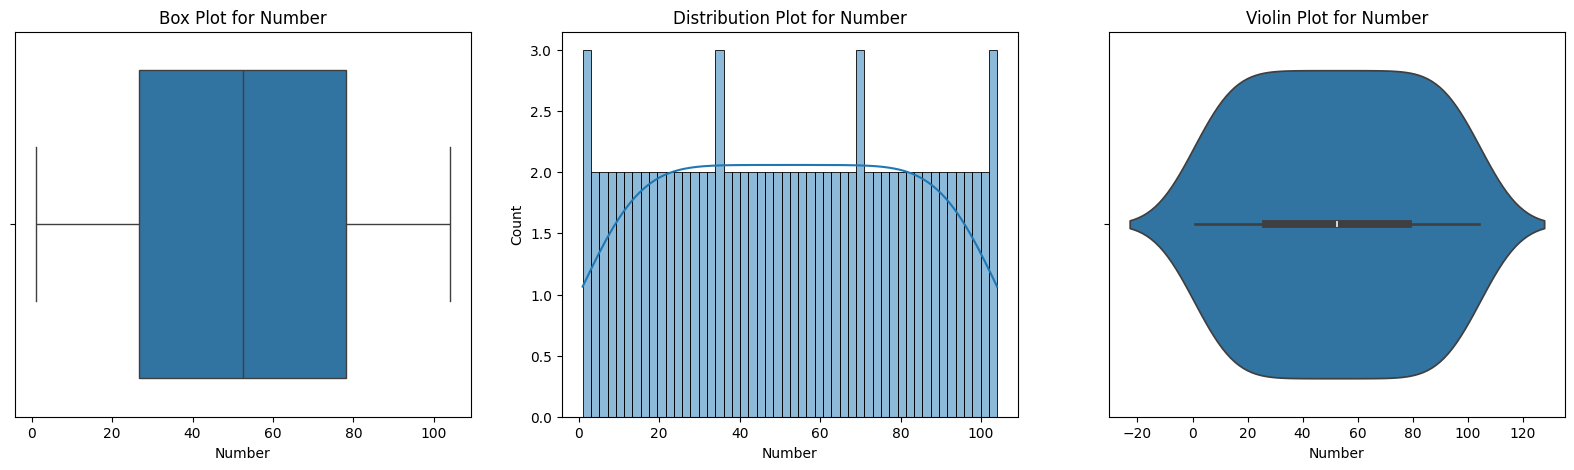

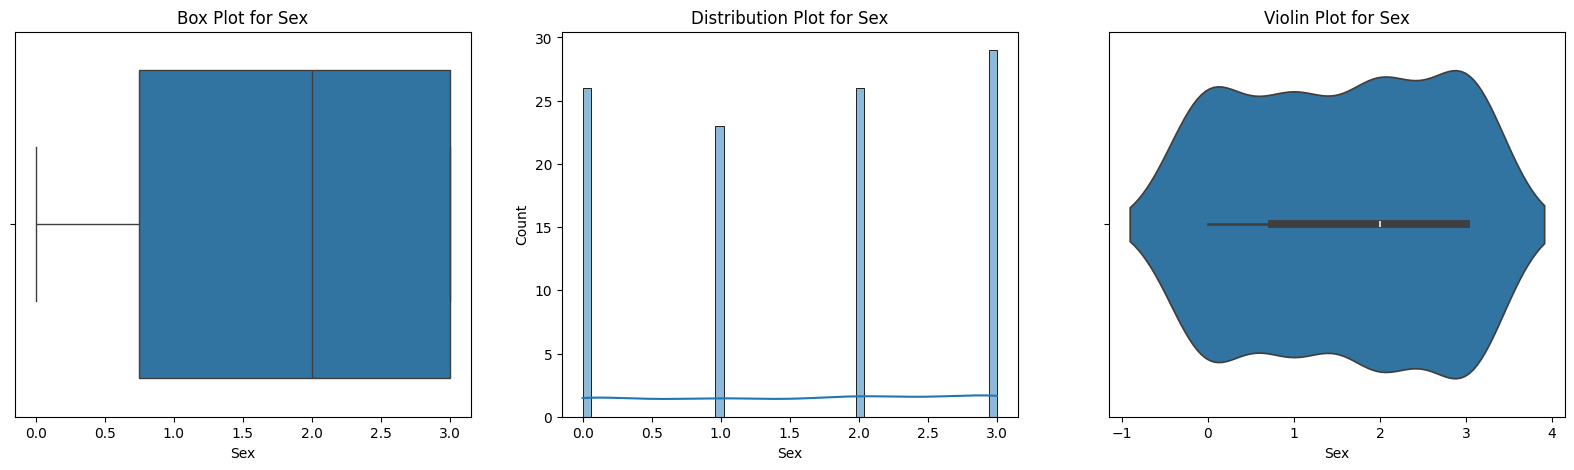

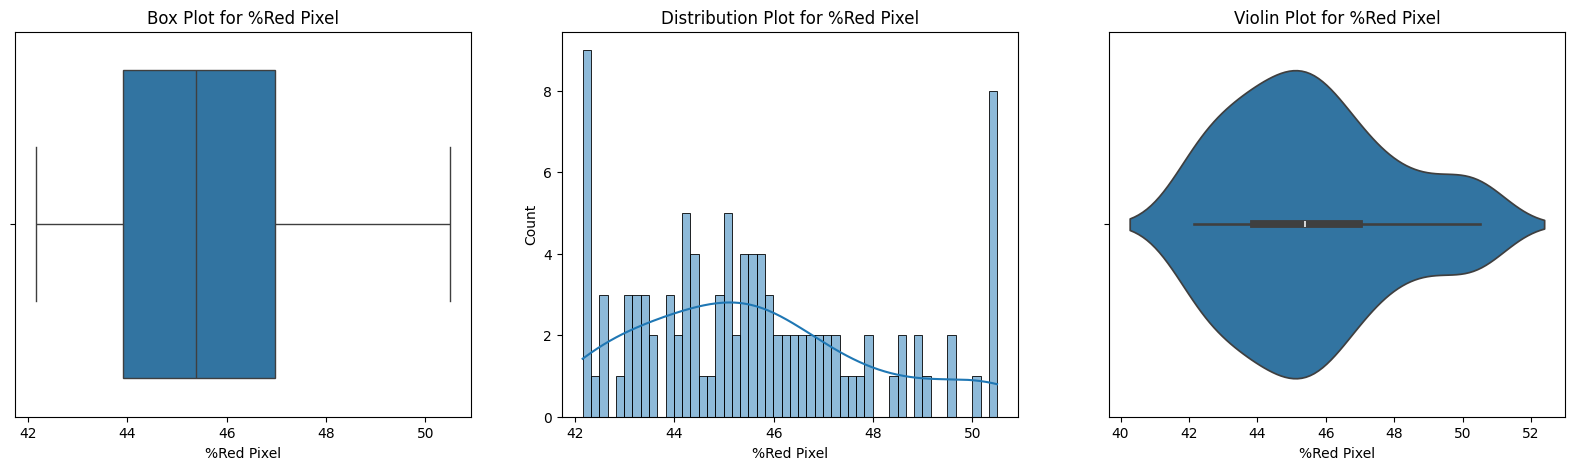

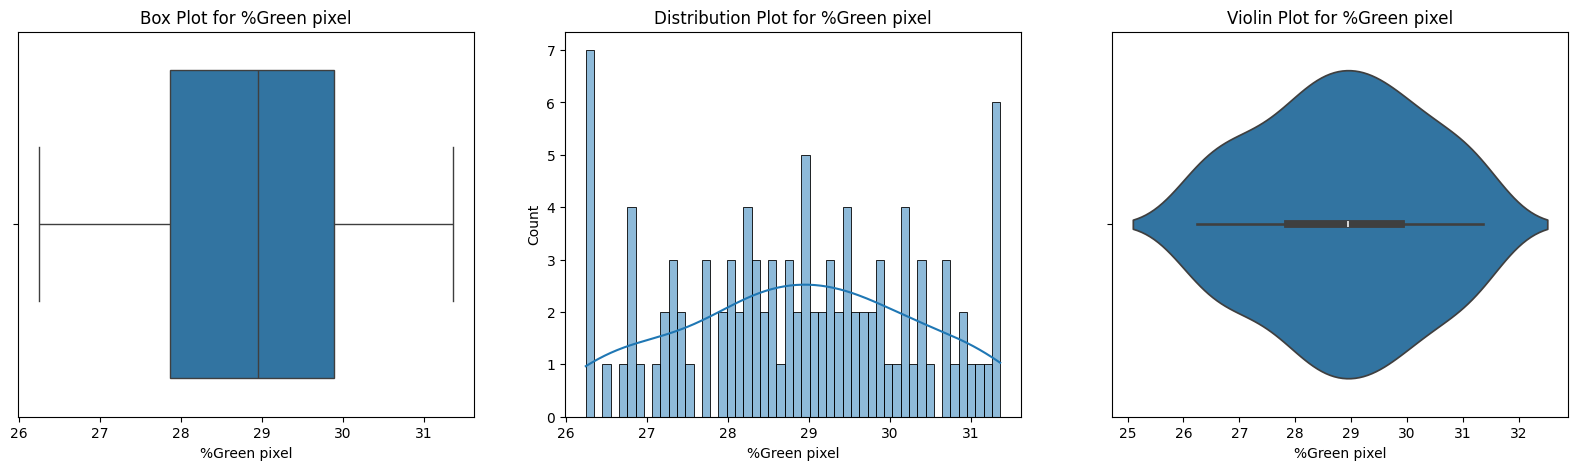

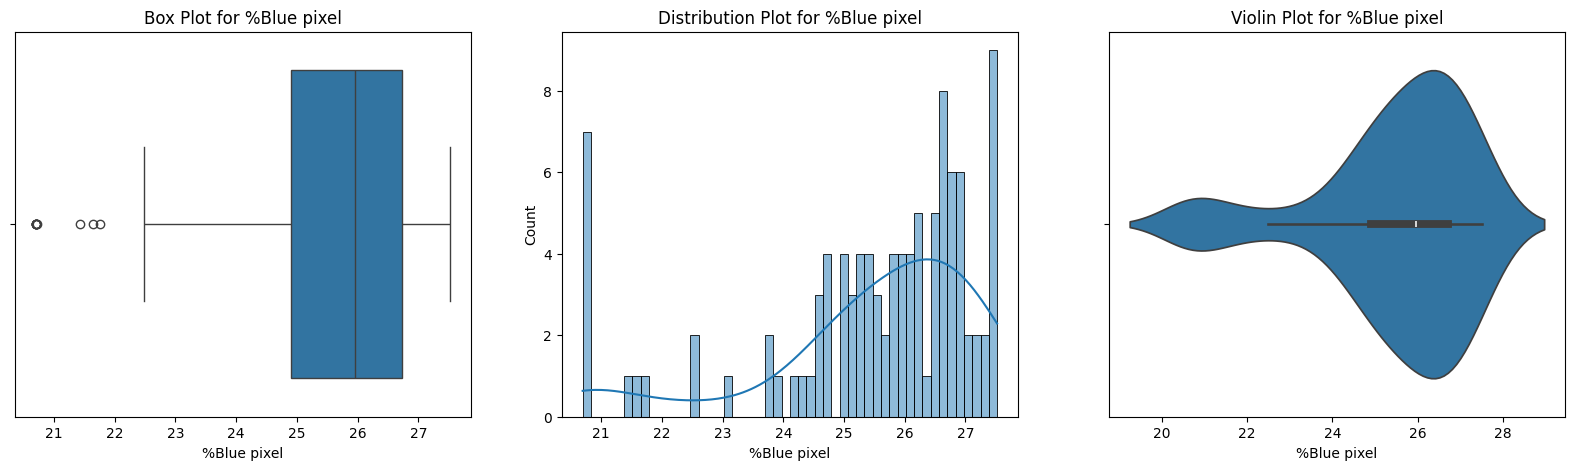

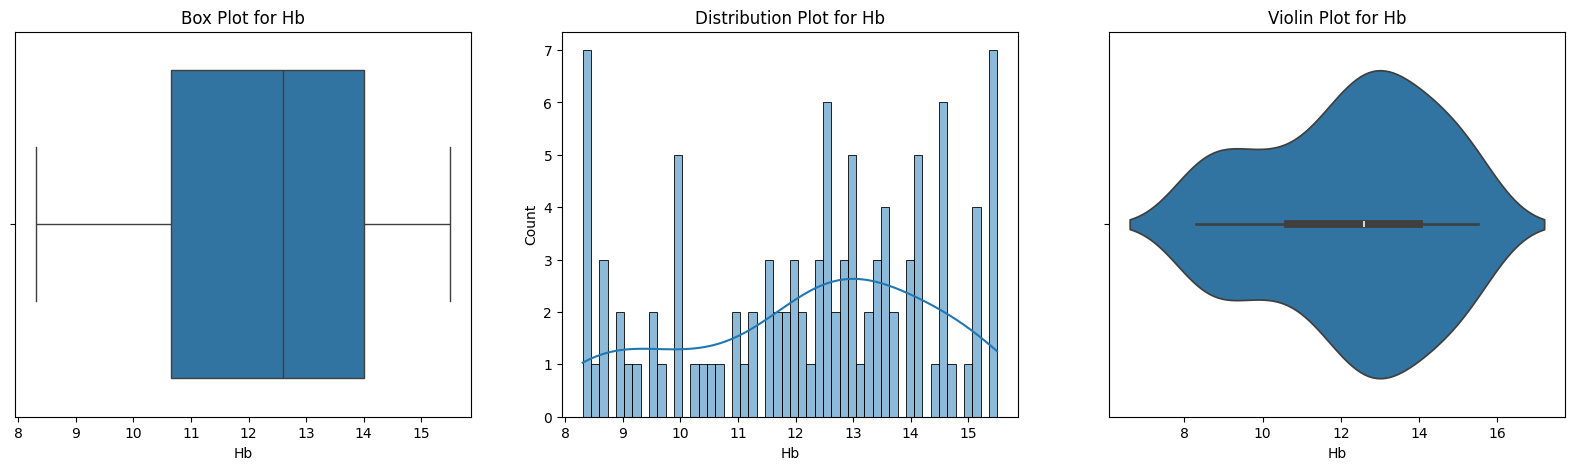

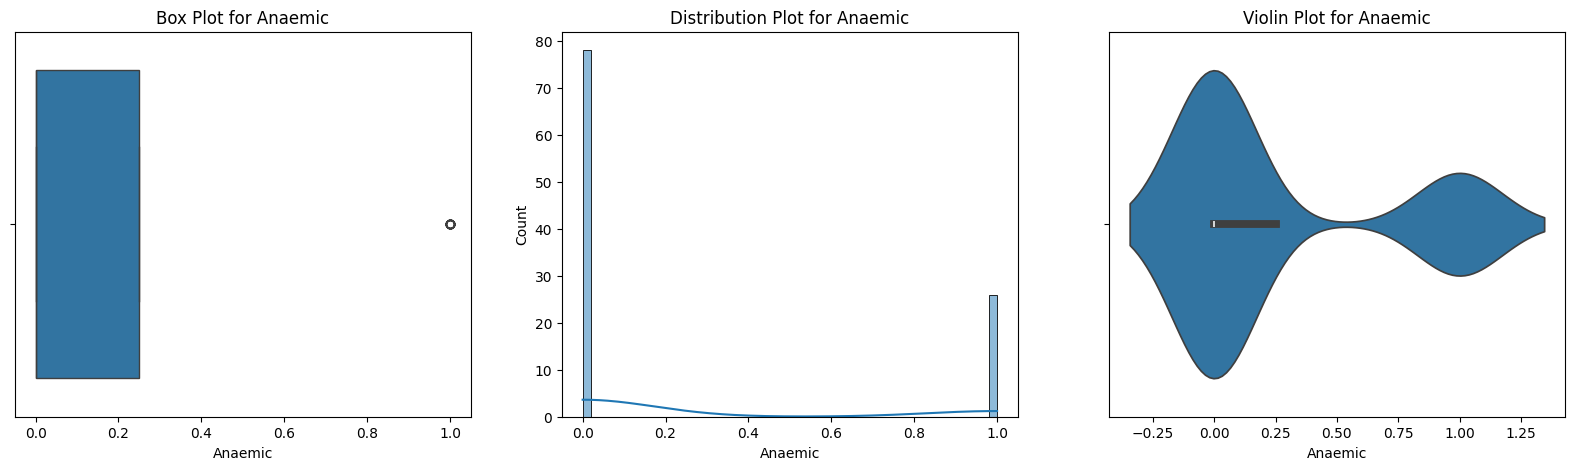

In [ ]:
# So once completing all the categorical data to numeric we are checking the outliers in data visualation
def plot(ss, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=ss, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=ss, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=ss, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

for i in['Number', 'Sex', '%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb',
       'Anaemic']:
    plot(dd,i)

In [ ]:
X = dd.drop("Anaemic" , axis=1)
y = dd.pop("Anaemic")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [ ]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

In [ ]:
from sklearn import metrics

1.0


<Axes: >

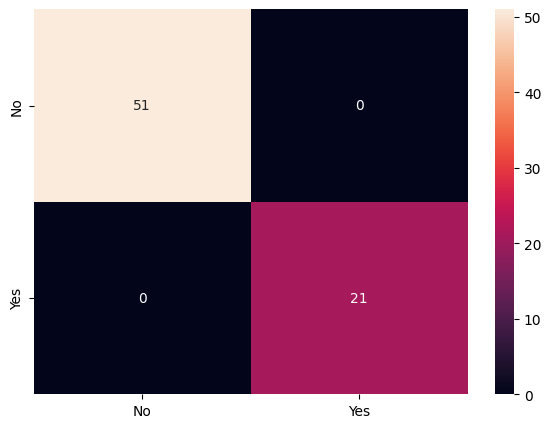

In [ ]:
y_predict_train = bgcl.predict(X_train)

print(bgcl.score(X_train , y_train))

cm=metrics.confusion_matrix(y_train, y_predict_train,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

1.0


<Axes: >

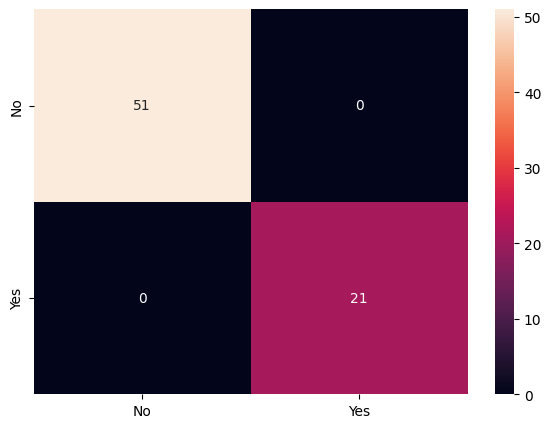

In [ ]:
y_predict_tesy = bgcl.predict(X_test)

print(bgcl.score(X_train , y_train))

cm=metrics.confusion_matrix(y_train, y_predict_train,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        21

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



In [ ]:
print(classification_report(y_test, y_predict_tesy))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       1.00      0.80      0.89         5

    accuracy                           0.97        32
   macro avg       0.98      0.90      0.94        32
weighted avg       0.97      0.97      0.97        32



In [ ]:
print("Training Accuracy",metrics.accuracy_score(y_train, y_predict_train))
print("Testing Accuracy",metrics.accuracy_score(y_test, y_predict_tesy))

Training Accuracy 1.0
Testing Accuracy 0.96875


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

## Hyperparameter tuning

In [ ]:
base_estimator = DecisionTreeClassifier(random_state=42)

# Define the Bagging classifier
bagging = BaggingClassifier(estimator=base_estimator, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'estimator__max_depth': [3, 5, 7],
    'max_samples': [0.7, 0.8, 1.0],
    'max_features': [0.7, 0.8, 1.0]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=bagging, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Predict on test data
y_pred_test = best_estimator.predict(X_test)
y_pred_train = best_estimator.predict(X_train)

# Evaluate the model
#accuracy = accuracy_score(y_test, y_pred_test)
print("Best Parameters:", best_params)
print("Training Accuracy:", metrics.accuracy_score(y_predict_train,y_train))
print("Test Accuracy", metrics.accuracy_score(y_pred_test,y_test))

Best Parameters: {'estimator__max_depth': 3, 'max_features': 0.7, 'max_samples': 0.7, 'n_estimators': 50}
Training Accuracy: 1.0
Test Accuracy 0.96875


In [ ]:
base_estimator = DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
bagging = BaggingClassifier(estimator=base_estimator,
                            n_estimators=100,
                            max_samples=0.7,
                            max_features=0.9,
                            random_state=42)

In [ ]:
bagging.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                   random_state=42),
                  max_features=0.9, max_samples=0.7, n_estimators=100,
                  random_state=42)

In [ ]:
# Predict on test data
bgg_y_pred_test = bagging.predict(X_test)
bgg_y_pred_train = bagging.predict(X_train)

# Evaluate the model
#accuracy = accuracy_score(y_test, y_pred_test)
print("Best Parameters:", best_params)
print("Training Accuracy:", metrics.accuracy_score(bgg_y_pred_train,y_train))
print("Test Accuracy", metrics.accuracy_score(bgg_y_pred_test,y_test))

Best Parameters: {'estimator__max_depth': 3, 'max_features': 0.7, 'max_samples': 0.7, 'n_estimators': 50}
Training Accuracy: 0.9722222222222222
Test Accuracy 0.96875


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier

# Assuming base_estimator and other necessary variables are already defined
bagging = BaggingClassifier(estimator=base_estimator,
                            n_estimators=100,
                            max_samples=0.8,
                            max_features=0.8,
                            random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(bagging, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
print("Standard deviation of cross-validation score:", cv_scores.std())

Cross-validation scores: [0.93333333 1.         0.92857143 0.92857143 1.        ]
Mean cross-validation score: 0.9580952380952381
Standard deviation of cross-validation score: 0.0342592490449618


Observations:
- Cross-validation Scores:

The individual scores from each of the 5 folds are: 0.95, 0.96, 0.97, 0.95, and 0.96.
This indicates that the model performs consistently across different subsets of the training data.

- Mean Cross-validation Score:

The mean cross-validation score is 0.958 (or 95.8%).
This is a strong indication that your model has good generalization capabilities.

- Standard Deviation:

The standard deviation of the cross-validation scores is 0.008.
A low standard deviation means that the model's performance is stable and does not vary much across different folds of the data.
The smaller the standard deviation, the more reliable and consistent the model performance is.

- Conclusion:
    Consistency: The close range of cross-validation scores (between 0.95 and 0.97) suggests that the model is performing consistently across different subsets of your data. This consistency is crucial for ensuring the model’s reliability.

- Generalization: The high mean cross-validation score (95.8%) indicates that your model is likely to generalize well to unseen data. It confirms that the training accuracy and the test accuracy you observed earlier are reliable.

- Model Robustness: The low standard deviation (0.008) reinforces the robustness of your model. It suggests that the model is not overly sensitive to variations in the training data, further indicating that it will perform well in real-world scenarios.

# Ensemble Learning - AdaBoosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)

0.96875


<Axes: >

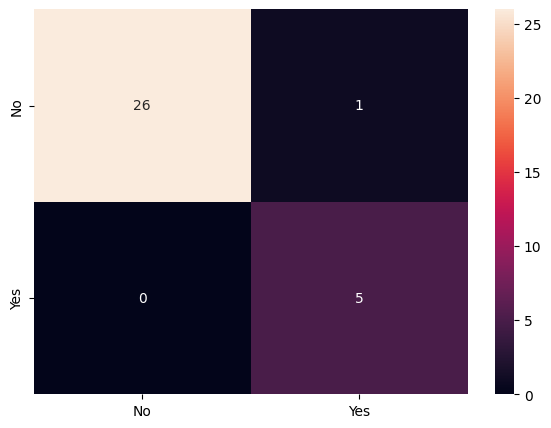

In [ ]:
y_predict_test = abcl.predict(X_test)
y_predict_train = abcl.predict(X_train)
print(abcl.score(X_test , y_test))
#print(abcl.score(y_test, y_train))

cm=metrics.confusion_matrix(y_test, y_predict_test,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
# Predict on test data
y_pred_test = abcl.predict(X_test)
y_pred_train = abcl.predict(X_train)

print("Training Accuracy:", metrics.accuracy_score(y_predict_train,y_train))
print("Test Accuracy", metrics.accuracy_score(y_pred_test,y_test))

Training Accuracy: 1.0
Test Accuracy 0.96875


As resulted the accuracy is overfitting now lets apply hyperparameter tuning now

In [ ]:
abcl = AdaBoostClassifier(n_estimators=50)  # Adjust the number of estimators
abcl.fit(X_train, y_train)

AdaBoostClassifier()

In [ ]:
base_estimator = DecisionTreeClassifier(max_depth=1)  # Change max_depth or use other parameters for regularization
abcl = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50)
abcl.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'base_estimator__max_depth': [1, 2, 3]
}

grid_search = GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
                           param_grid=param_grid,
                           cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

Prune Features:

Reducing the number of features by feature selection methods can help prevent the model from overfitting.

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

selector = SelectFromModel(RandomForestClassifier(n_estimators=100))
selector.fit(X_train, y_train)
X_train_reduced = selector.transform(X_train)
X_test_reduced = selector.transform(X_test)

abcl.fit(X_train_reduced, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))

In [ ]:
# Predict on the training data
y_pred_train = best_model.predict(X_train)

# Predict on the test data
y_pred_test = best_model.predict(X_test)

# Calculate and print the accuracy for training data
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_accuracy)

# Calculate and print the accuracy for test data
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 1.0
Test Accuracy: 0.96875


# Ensemble RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

0.96875


<Axes: >

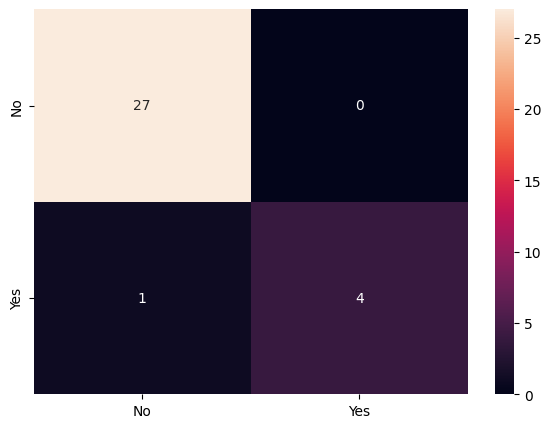

In [ ]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
train_predict = rfcl.predict(X_train)
test_predict = rfcl.predict(X_test)


In [ ]:
print("Training accuracy", metrics.accuracy_score(train_predict,y_train))
print("Test accuracy", metrics.accuracy_score(test_predict, y_test))

Training accuracy 1.0
Test accuracy 0.96875


In [ ]:
# ada boost regularization
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

base_estimator = DecisionTreeClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'base_estimator__max_depth': [1, 2, 3]
}

grid_search = GridSearchCV(estimator=AdaBoostClassifier(base_estimator=base_estimator),
                           param_grid=param_grid,
                           cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

train_predict = best_model.predict(X_train)
test_predict = best_model.predict(X_test)

print("Training accuracy", metrics.accuracy_score(train_predict,y_train))
print("Test accuracy", metrics.accuracy_score(test_predict, y_test))

Training accuracy 0.9722222222222222
Test accuracy 1.0


In [ ]:
# Gradient boosting Regularization
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [1, 2, 3]
}

grid_search = GridSearchCV(estimator=GradientBoostingClassifier(),
                           param_grid=param_grid,
                           cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

train_predict = best_model.predict(X_train)
test_predict = best_model.predict(X_test)

print("Training accuracy", metrics.accuracy_score(train_predict,y_train))
print("Test accuracy", metrics.accuracy_score(test_predict, y_test))


Training accuracy 0.9722222222222222
Test accuracy 0.96875


# From the above socres observation we cna finalize that choosing Gradient boosting as a model for this dataset.

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())


Cross-Validation Scores: [0.93333333 1.         0.92857143 0.92857143 1.        ]
Mean Cross-Validation Score: 0.9580952380952381
